# Importando as bibliotecas

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
import gdown

# Importando os dados do problema:


In [17]:
dataset_url = "https://drive.google.com/uc?id=1pFAG3vH1zbKhghgq5A42Zu8_zTYMAEIR"
dataset_csv = "dataset.csv"
gdown.download(dataset_url, dataset_csv, quiet=False)
dataset = pd.read_csv(dataset_csv)
dataset

Downloading...
From: https://drive.google.com/uc?id=1pFAG3vH1zbKhghgq5A42Zu8_zTYMAEIR
To: /content/dataset.csv
100%|██████████| 365/365 [00:00<00:00, 833kB/s]


,Registro,Tem casa própria,Estado Civil,Rendimentos,Bom Pagador
0,1,Sim,Solteiro,Alto,Não
1,2,Não,Casado,Médio,Não
2,3,Não,Solteiro,Baixo,Não
3,4,Sim,Casado,Alto,Não
4,5,Não,Divorciado,Médio,Sim
5,6,Não,Casado,Baixo,Não
6,7,Sim,Divorciado,Alto,Sim
7,8,Não,Solteiro,Médio,Sim
8,9,Não,Casado,Baixo,Não
9,10,Não,Solteiro,Médio,Sim


# Transformando dados categóricos em dados numéricos
* Tem casa própria SIM = 1, Tem casa própria NÃO = 0
* Estado civil SOLTEIRO = 0, CASADO = 1, DIVORCIADO = 2
* rendimentos BAIXO = 0, MÉDIO = 1, ALTO = 2
* Bom pagador SIM = 1, NÃO = 0

In [18]:
temCasaPropria = {'Sim': 1, 'Não': 0}
bomPagador = {'Sim': 1, 'Não': 0}
estadoCivil = {'Solteiro': 0, 'Casado': 1, 'Divorciado': 2}
rendimentos = {'Baixo': 0, 'Médio': 1, 'Alto': 2}

dataset['Tem casa própria'] = dataset['Tem casa própria'].map(temCasaPropria)
dataset['Estado Civil'] = dataset['Estado Civil'].map(estadoCivil)
dataset['Rendimentos'] = dataset['Rendimentos'].map(rendimentos)
dataset['Bom Pagador'] = dataset['Bom Pagador'].map(bomPagador)

dataset

,Registro,Tem casa própria,Estado Civil,Rendimentos,Bom Pagador
0,1,1,0,2,0
1,2,0,1,1,0
2,3,0,0,0,0
3,4,1,1,2,0
4,5,0,2,1,1
5,6,0,1,0,0
6,7,1,2,2,1
7,8,0,0,1,1
8,9,0,1,0,0
9,10,0,0,1,1


#Separando matriz de entradas **($\vec{x}$)** do vetor de saída **($\vec{y}$)**

In [27]:
x = dataset.drop(columns=['Bom Pagador', 'Registro'])
y = dataset['Bom Pagador']
print(x)

    Tem casa própria  Estado Civil  Rendimentos
0                  1             0            2
1                  0             1            1
2                  0             0            0
3                  1             1            2
4                  0             2            1
5                  0             1            0
6                  1             2            2
7                  0             0            1
8                  0             1            0
9                  0             0            1
10                 1             2            1


In [25]:
print(y)

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     0
9     1
10    0
Name: Bom Pagador, dtype: int64


# Usando a Árvore de Decisão para fazer a previsão



In [34]:
arvore = DecisionTreeClassifier()
arvore = arvore.fit(x, y)

#tem casa própria = NÃO, estado civil = DIVORCIADO, rendimento = ALTO
dado_problema = [[0, 2, 2]]
previsao = arvore.predict(dado_problema)

if ((previsao[0]) == 1):
  print("O cliente é bom pagador")
else:
  print("O cliente não é bom pagador")

O cliente é bom pagador


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualizando a árvore de decisão

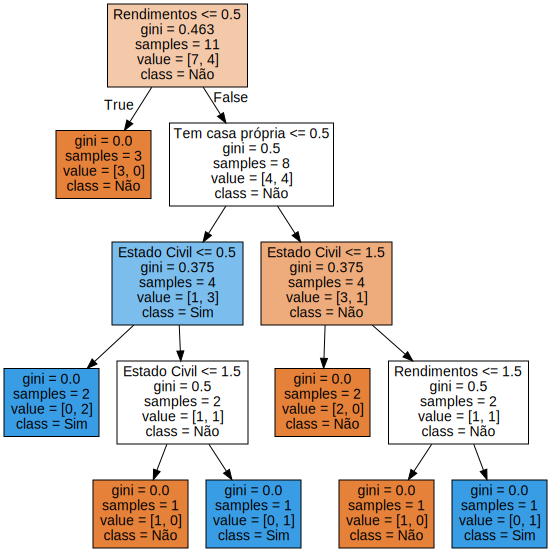

In [38]:
export_graphviz(arvore, out_file='arvore_de_decisoes.dot', feature_names=x.columns, class_names=['Não', 'Sim'], filled=True, rounded=False)
!dot -Tpng arvore_de_decisoes.dot -o arvore_de_decisoes.png
graphviz.Source.from_file('arvore_de_decisoes.dot')